In [1]:
import torch 
import pandas as pd 
import numpy as np
from torch.utils.data import Dataset , DataLoader
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt 
import torch.nn as nn
import torch.nn.functional as F 





# First with pytorch library 

In [2]:
dir(datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'Imagenette',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'MovingMNIST',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 

In [3]:
# just some preprocessing
transform = transforms.Compose([transforms.ToTensor() , transforms.Normalize((0.1307,), (0.3081,))])

In [4]:
training_data = datasets.MNIST(root = "data" , train=True , download= True , transform= transform)
testing_data = datasets.MNIST(root = "data" , download=True , train= False , transform= transform)
    


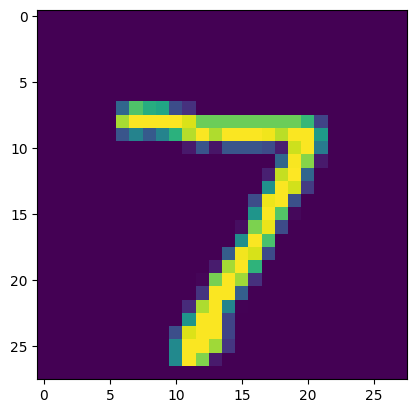

In [5]:
plt.imshow(testing_data[0][0].squeeze())
plt.show()

In [6]:
train_dataloader = DataLoader(training_data , shuffle=True , batch_size=64)
test_dataloader = DataLoader(testing_data , shuffle=True, batch_size=64 )

tensor(4)

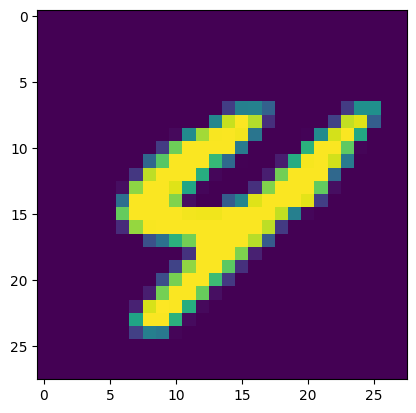

In [77]:
#checking the dataloader 
img , label = next(iter(test_dataloader))
plt.imshow(img[0].squeeze()) 
label[0]

In [43]:
# define the model 

class MyNet(nn.Module):
    def __init__(self): 
        super().__init__()
        self.conv1 = nn.Conv2d(1 , 128 , 5)
        self.conv2 = nn.Conv2d(128 , 256 , 5)
        self.fc1 = nn.Linear(256 * 10 * 10 , 512, bias=True)
        self.fc2 = nn.Linear(512 , 128)
        self.fc3 = nn.Linear(128 , 10)
    
    def forward(self , x ):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x , 2)
        x = torch.flatten(x , 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        op = F.log_softmax(x , dim = 1)
        return op 



    

In [44]:
model = MyNet().to(device='mps')

In [45]:
print(model)

MyNet(
  (conv1): Conv2d(1, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=25600, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [58]:
optimizer = torch.optim.SGD(model.parameters() , lr=0.01 , momentum=0.8)
loss_fn = nn.CrossEntropyLoss()
epochs= 2

In [59]:
device = 'mps'

In [60]:
def train(model , train_data , device , optimizer , epoch  ): 
    '''model.train() tells your model that you are training the model. This helps inform layers such as Dropout and BatchNorm, which are designed to behave differently during training and evaluation.
      For instance, in training mode, BatchNorm updates a moving average on each new batch; whereas, for evaluation mode, these updates are frozen.
    More details: model.train() sets the mode to train (see source code). You can call either model.eval() or model.train(mode=False) to tell that you are testing. 
    It is somewhat intuitive to expect train function to train model but it does not do that. It just sets the mode.'''
    model.train()
    for batch , (data , label) in enumerate(train_data):
        data , label = data.to(device) , label.to(device)
        optimizer.zero_grad() # zeros out the weights 
        output = model(data)
        loss = loss_fn(output , label)
        loss.backward()
        optimizer.step()# performs weight update 
        print(f"Epoch{epoch}| Training Loss :{loss}")




    

In [61]:
def test(model , test_data , device):
    model.eval()
    for data , label in test_data:
        data , label = data.to(device) , label.to(device)
        pred = model(data)
        loss = loss_fn(pred ,label)
        print(f"Test loss : {loss}")


In [62]:
for epoch in range(1 , epochs):
    train(model , train_dataloader , device , optimizer , epoch)
    test(model , test_dataloader , device)

Epoch1| Training Loss :0.001705596107058227
Epoch1| Training Loss :0.004793809726834297
Epoch1| Training Loss :0.003847738727927208
Epoch1| Training Loss :0.004473344422876835
Epoch1| Training Loss :0.01559675857424736
Epoch1| Training Loss :0.08140085637569427
Epoch1| Training Loss :0.02008131518959999
Epoch1| Training Loss :0.009924937970936298
Epoch1| Training Loss :0.004557115491479635
Epoch1| Training Loss :0.02444801665842533
Epoch1| Training Loss :0.0049202656373381615
Epoch1| Training Loss :0.01021316647529602
Epoch1| Training Loss :0.007715798914432526
Epoch1| Training Loss :0.014616915956139565
Epoch1| Training Loss :0.012217029929161072
Epoch1| Training Loss :0.01129236351698637
Epoch1| Training Loss :0.002604045905172825
Epoch1| Training Loss :0.0009863566374406219
Epoch1| Training Loss :0.0023041139356791973
Epoch1| Training Loss :0.07776045054197311
Epoch1| Training Loss :0.00330218393355608
Epoch1| Training Loss :0.03545919805765152
Epoch1| Training Loss :0.0088095506653

In [89]:
model.eval()
img , label = next(iter(test_dataloader))
img , label = img.to(device) , label.to(device)
pred = model(img[0].unsqueeze(0))
print(label[0])

tensor(2, device='mps:0')


In [90]:
_ , pred = torch.max(pred , 1 ) # tensor pred is of form [batch , classes] so dim 1 is classes it finds the max value within classes 
# _ is actual max value and pred is the position where max value is located i.e the class 

In [91]:
pred

tensor([2], device='mps:0')